<a href="https://colab.research.google.com/github/yrlmzmerve/Open_CV_Tutorial/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection

Dijital görüntü / videolarda belirli bir sınıftaki (insanlar, binalar, arabalar.. ) anlamsal nesnelerin örneklerini anlamakla ilgilenen, bilgisayarla görme ve görüntü işleme ile ilgili bir teknolojidir


Amaç görüntü üzerinde bulunan nesnenin koordinatlarının, genişlik ve yükseklik değerlerinin bulunmasıdır

### 1. Kenar Algılama

Görüntü parlaklığının keskin bir biçimde değiştiği noktaları tanımlamayı amaçlayan yöntem

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1199.5, 1199.5, -0.5))

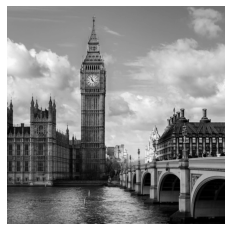

In [ ]:
# resmi içe aktar
img = cv2.imread("london.jpg", 0)
plt.figure(), plt.imshow(img, cmap = "gray"), plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1199.5, 1199.5, -0.5))

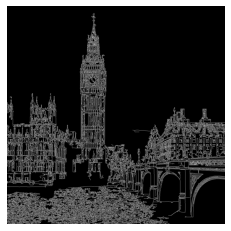

In [ ]:
edges = cv2.Canny(image = img, threshold1 = 0, threshold2 = 255)
plt.figure(), plt.imshow(edges, cmap = "gray"), plt.axis("off")

In [ ]:
med_val = np.median(img)
print(med_val)

140.0


In [ ]:
low = int(max(0, (1 - 0.33)*med_val))
high = int(min(255, (1 + 0.33)*med_val))

In [ ]:
print(low)
print(high)

93
186


(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1199.5, 1199.5, -0.5))

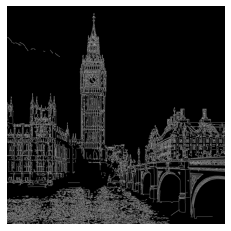

In [ ]:
edges = cv2.Canny(image = img, threshold1 = low, threshold2 = high)
plt.figure(), plt.imshow(edges, cmap = "gray"), plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1199.5, 1199.5, -0.5))

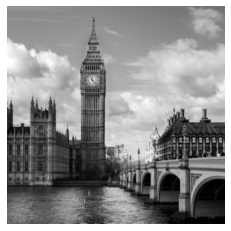

In [ ]:
# blur
blurred_img = cv2.blur(img, ksize = (5,5))
plt.figure(), plt.imshow(blurred_img, cmap = "gray"), plt.axis("off")

In [ ]:
med_val = np.median(blurred_img)
print(med_val)

139.0


In [ ]:
low = int(max(0, (1 - 0.33)*med_val))
high = int(min(255, (1 + 0.33)*med_val))

In [ ]:
print(low)
print(high)

93
184


(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1199.5, 1199.5, -0.5))

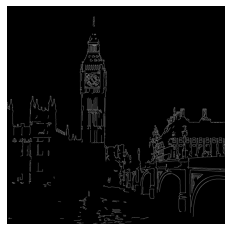

In [ ]:
edges = cv2.Canny(image = blurred_img, threshold1 = low, threshold2 = high)
plt.figure(), plt.imshow(edges, cmap = "gray"), plt.axis("off")

### 2. Köşe Algılama

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(294, 316)


(<Figure size 432x288 with 1 Axes>,
 (-0.5, 315.5, 293.5, -0.5))

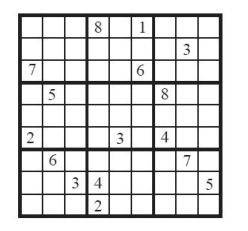

In [ ]:
# resmi içe aktar
img = cv2.imread("sudoku.jpg", 0)
img = np.float32(img)
print(img.shape)
plt.figure(), plt.imshow(img, cmap = "gray"), plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 315.5, 293.5, -0.5))

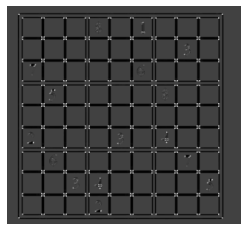

In [ ]:
# harris corner detection
dst = cv2.cornerHarris(img, blockSize = 2, ksize = 3, k = 0.04)
plt.figure(), plt.imshow(dst, cmap = "gray"), plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 315.5, 293.5, -0.5))

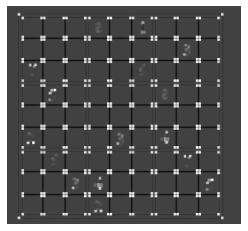

In [ ]:
dst = cv2.dilate(dst, None)
img[dst>0.2*dst.max()] = 1
plt.figure(), plt.imshow(dst, cmap = "gray"), plt.axis("off")

In [ ]:
# shi tomasi detection
img = cv2.imread("sudoku.jpg", 0)
img = np.float32(img)
corners = cv2.goodFeaturesToTrack(img, 120, 0.01, 10)
corners = np.int64(corners)

In [ ]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(img, (x,y),3,(125,125,125),cv2.FILLED)

(-0.5, 315.5, 293.5, -0.5)

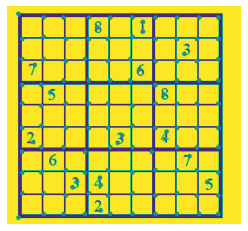

In [ ]:
plt.imshow(img)
plt.axis("off")

### 3. Kontur Algılama

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 450.5, 281.5, -0.5))

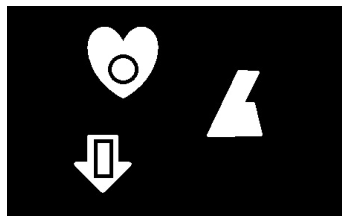

In [ ]:
# resmi içe aktar
img = cv2.imread("contour.jpg",0)
plt.figure(), plt.imshow(img, cmap = "gray"), plt.axis("off")

In [ ]:
# farklı sürüm için 
# image, contours, hierarch = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
contours, hierarch = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
external_contour = np.zeros(img.shape)
internal_contour = np.zeros(img.shape)

In [ ]:
for i in range(len(contours)):
    
    # external
    if hierarch[0][i][3] == -1:
        cv2.drawContours(external_contour,contours, i, 255, -1)
    else: # internal
        cv2.drawContours(internal_contour,contours, i, 255, -1)

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 450.5, 281.5, -0.5))

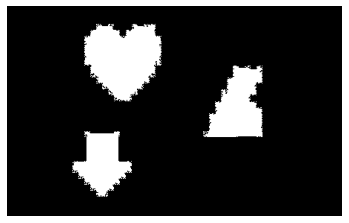

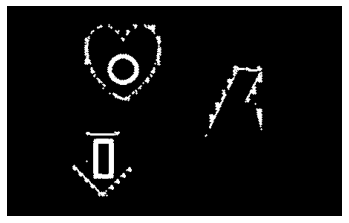

In [ ]:
plt.figure(), plt.imshow(external_contour, cmap = "gray"),plt.axis("off")
plt.figure(), plt.imshow(internal_contour, cmap = "gray"),plt.axis("off")

### 4. Renk ile Nesne Tespiti

Konturlar basitçe, aynı renk veya yoğunluğa sahip tüm sürekli noktaları birleştiren bir eğri olarak açıklanabilir

Konturlar şekil analizi ve nesne algılama, tanıma için kullanışlı bir araçtır.

In [2]:
import cv2
import matplotlib.pyplot as plt
from collections import deque # tespit edilen objenin merkezini depolamak için kullanacağız

In [3]:
# nesne merkezini depolayacak veri tipi
buffer_size = 16
pts = deque(maxlen = buffer_size)

In [4]:
# mavi renk aralığı HSV
blueLower = (84,  98,  0)
blueUpper = (179, 255, 255)

In [ ]:
while True:
    
    success, imgOriginal = cap.read()
    
    if success: 
        
        # blur ()
        blurred = cv2.GaussianBlur(imgOriginal, (11,11), 0) 
        
        # hsv
        hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
        cv2.imshow("HSV Image",hsv)
        
        # mavi için maske oluştur
        mask = cv2.inRange(hsv, blueLower, blueUpper)
        cv2.imshow("mask Image",mask)
        
        # maskenin etrafında kalan gürültüleri sil
        mask = cv2.erode(mask, None, iterations = 2)
        mask = cv2.dilate(mask, None, iterations = 2)
        cv2.imshow("Mask + erozyon ve genisleme",mask)
        
        # farklı sürüm için
        # (_, contours,_) = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # kontur
        (contours,_) = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        center = None

        if len(contours) > 0:
            
            # en buyuk konturu al
            c = max(contours, key = cv2.contourArea)
            
            # dikdörtgene çevir 
            rect = cv2.minAreaRect(c)
            
            ((x,y), (width,height), rotation) = rect
            
            s = "x: {}, y: {}, width: {}, height: {}, rotation: {}".format(np.round(x),np.round(y),np.round(width),np.round(height),np.round(rotation))
            print(s)
            
            # kutucuk
            box = cv2.boxPoints(rect)
            box = np.int64(box)
            
            # moment
            M = cv2.moments(c)
            center = (int(M["m10"]/M["m00"]), int(M["m01"]/M["m00"]))
            
            # konturu çizdir: sarı
            cv2.drawContours(imgOriginal, [box], 0, (0,255,255),2)
            
            # merkere bir tane nokta çizelim: pembe
            cv2.circle(imgOriginal, center, 5, (255,0,255),-1)
            
            # bilgileri ekrana yazdır
            cv2.putText(imgOriginal, s, (25,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,255,255), 2)
            
            
        # deque
        pts.appendleft(center)
        
        for i in range(1, len(pts)):
            
            if pts[i-1] is None or pts[i] is None: continue
        
            cv2.line(imgOriginal, pts[i-1], pts[i],(0,255,0),3) # 
            
        cv2.imshow("Orijinal Tespit",imgOriginal)
        
    if cv2.waitKey(1) & 0xFF == ord("q"): break
    

### 5. Şablon Eşleme

Şablon eşleştirme, bir şablon görüntünün konumunu daha büyük bir görüntüde aramak ve bulmak için bir yöntemdir.

Şablon görüntüsünü giriş görüntüsünün üzerine kaydırır ve şablon görüntüsünün altındaki giriş görüntüsünün şablonu ve yamayı karşılaştırır.

In [23]:
import cv2
import matplotlib.pyplot as plt

In [24]:
# template matching: sablon esleme

img = cv2.imread("cat.jpg", 0)
print(img.shape)
template = cv2.imread("cat_face.jpg", 0)
print(template.shape)
h, w = template.shape

(433, 650)
(219, 253)


(Text(0.5, 1.0, 'Büyük Resim'), (-0.5, 649.5, 432.5, -0.5))

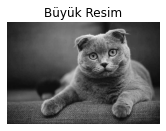

In [25]:
plt.figure()
plt.subplot(121), plt.imshow(img, cmap = "gray")
plt.title("Büyük Resim"), plt.axis("off")

(Text(0.5, 1.0, 'Aranacak Resim'), (-0.5, 252.5, 218.5, -0.5))

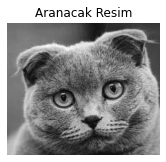

In [26]:
plt.figure()
plt.subplot(121), plt.imshow(template, cmap = "gray")
plt.title("Aranacak Resim"), plt.axis("off")

In [27]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

(215, 398)


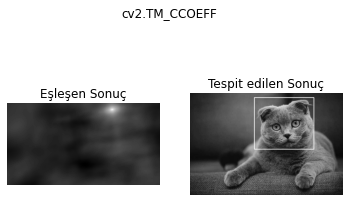

(215, 398)


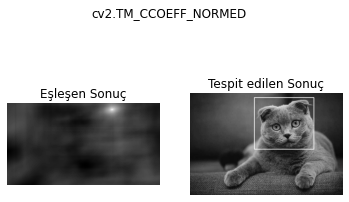

(215, 398)


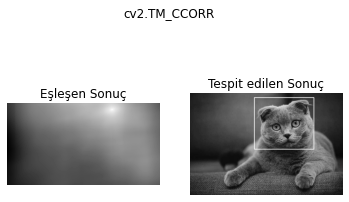

(215, 398)


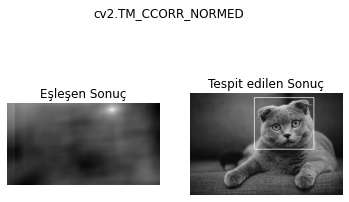

(215, 398)


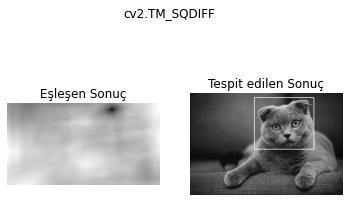

(215, 398)


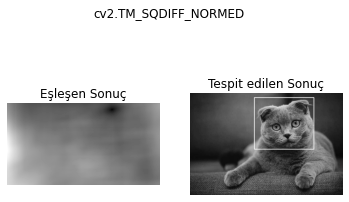

In [28]:
for meth in methods:
    
    method = eval(meth) # 'cv2.TM_CCOEFF' -> cv2.TM_CCOEFF
    
    res = cv2.matchTemplate(img, template, method)
    print(res.shape)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv2.rectangle(img, top_left, bottom_right, 255, 2)
    
    plt.figure()
    plt.subplot(121), plt.imshow(res, cmap = "gray")
    plt.title("Eşleşen Sonuç"), plt.axis("off")
    plt.subplot(122), plt.imshow(img, cmap = "gray")
    plt.title("Tespit edilen Sonuç"), plt.axis("off")
    plt.suptitle(meth)
    
    plt.show()

### 6. Özellik Eşleme

Görüntü işlemede nokta özelliği eşleşmesi, karmaşık bir sahnede belirtilen bir hedefi tespit etmek için etkili bir yöntemdir

Bu yöntem, birden çok nesne yerine tek nesneyi algılar

Brute Force eşleştiricisi, bir görüntüdeki bir özelliğin tanımlayıcısını başka bir görüntünün diğer tüm özellikleriyle eşleştirir ve mesafeye göre eşleşmeyi döndürür.

Tüm özelliklerle eşleşmeyi kontrol ettiği için yavaştır.

Ölçek değişmez özellik dönüşümü, anahtar noktaları ilk olarak bir dizi referans görüntüden çıkarılır ve saklanır.

Yeni görüntüdeki her bir özelliği bu saklanan veri ile ayrı ayrı karşılaştırarak ve öznitelik vektörlerinin Öklit mesafesine dayalı olarak aday eşleştirme özelliklerini bularak yeni bir görüntüde yeni bir nesne tanınır.

In [13]:
import cv2
import matplotlib.pyplot as plt

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 511.5, 125.5, -0.5))

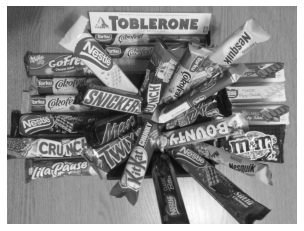

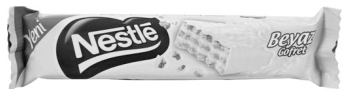

In [14]:
# ana görüntüyü içe aktar
chos = cv2.imread("chocolates.jpg", 0)
plt.figure(), plt.imshow(chos, cmap = "gray"),plt.axis("off")

# aranacak olan görüntü
cho = cv2.imread("nestle.jpg", 0)
plt.figure(), plt.imshow(cho, cmap = "gray"),plt.axis("off")

In [15]:
# orb tanımlayıcı
# köşe-kenar gbi nesneye ait özellikler
orb = cv2.ORB_create()

In [16]:
# anahtar nokta tespiti
kp1, des1 = orb.detectAndCompute(cho, None)
kp2, des2 = orb.detectAndCompute(chos, None)

In [17]:
# bf matcher (Brute Force)
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
# noktaları eşleştir
matches = bf.match(des1, des2)

# mesafeye göre sırala
matches = sorted(matches, key = lambda x: x.distance)

(<matplotlib.image.AxesImage at 0x7feaa7d425d0>,
 (-0.5, 1521.5, 757.5, -0.5),
 Text(0.5, 1.0, 'orb'))

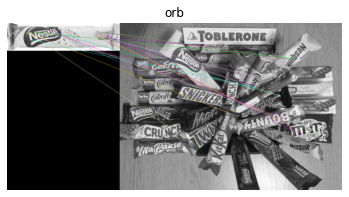

In [18]:
# eşleşen resimleri görselleştirelim
plt.figure()
img_match = cv2.drawMatches(cho, kp1, chos, kp2, matches[:20], None, flags = 2)
plt.imshow(img_match), plt.axis("off"),plt.title("orb")

In [19]:
# sift
sift = cv2.xfeatures2d.SIFT_create()

# bf
bf = cv2.BFMatcher()

# anahtar nokta tespiti sift ile
kp1, des1 = sift.detectAndCompute(cho, None)
kp2, des2 = sift.detectAndCompute(chos, None)

matches = bf.knnMatch(des1, des2, k = 2)

(<matplotlib.image.AxesImage at 0x7feaa5a4c390>,
 (-0.5, 1521.5, 757.5, -0.5),
 Text(0.5, 1.0, 'sift'))

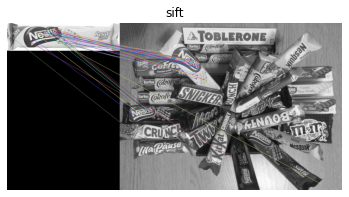

In [20]:
guzel_eslesme = []

for match1, match2 in matches:
    
    if match1.distance < 0.75*match2.distance:
        guzel_eslesme.append([match1])
    
plt.figure()
sift_matches = cv2.drawMatchesKnn(cho,kp1,chos,kp2,guzel_eslesme,None, flags = 2)
plt.imshow(sift_matches), plt.axis("off"), plt.title("sift")

### 7. Havza Algoritması

In [29]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1023.5, 767.5, -0.5))

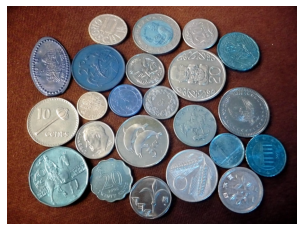

In [30]:
# içe aktar
coin = cv2.imread("coins.jpg")
plt.figure(), plt.imshow(coin), plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1023.5, 767.5, -0.5))

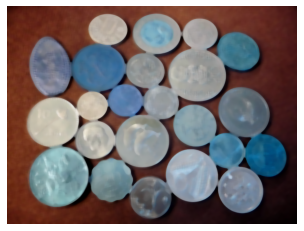

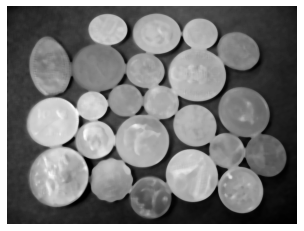

In [31]:
# lpf: blurring
coin_blur = cv2.medianBlur(coin, 13)
plt.figure(), plt.imshow(coin_blur), plt.axis("off")

# grayscale
coin_gray = cv2.cvtColor(coin_blur, cv2.COLOR_BGR2GRAY)
plt.figure(), plt.imshow(coin_gray, cmap="gray"), plt.axis("off")

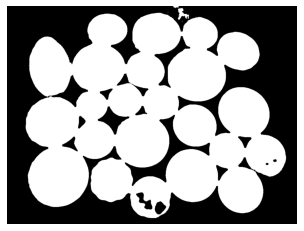

In [32]:
# binary threshold
ret, coin_thresh = cv2.threshold(coin_gray, 75, 255, cv2.THRESH_BINARY)
plt.figure(), plt.imshow(coin_thresh, cmap="gray"), plt.axis("off")

# kontur
# _, contours, hierarchy = cv2.findContours(coin_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(coin_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1023.5, 767.5, -0.5))

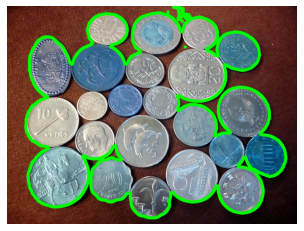

In [33]:
for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(coin, contours,i,(0,255,0),10)
plt.figure(),plt.imshow(coin),plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1023.5, 767.5, -0.5))

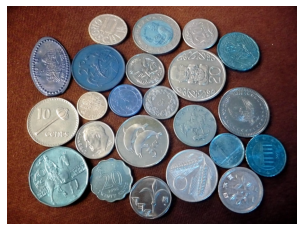

In [34]:
# watershed

# içe aktar
coin = cv2.imread("coins.jpg")
plt.figure(), plt.imshow(coin), plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1023.5, 767.5, -0.5))

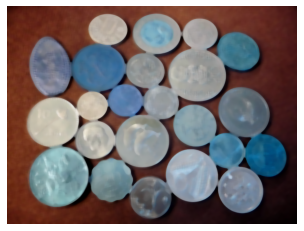

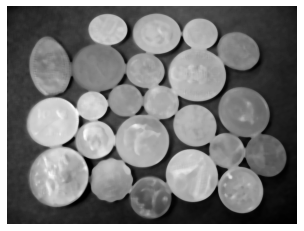

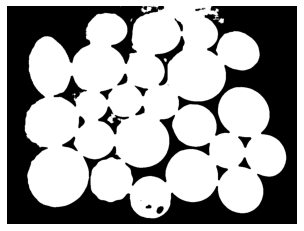

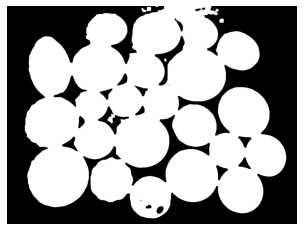

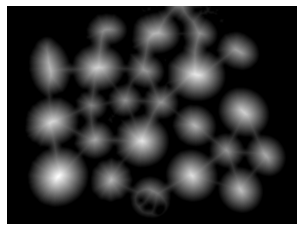

In [35]:
# lpf: blurring
coin_blur = cv2.medianBlur(coin, 13)
plt.figure(), plt.imshow(coin_blur), plt.axis("off")

# grayscale
coin_gray = cv2.cvtColor(coin_blur, cv2.COLOR_BGR2GRAY)
plt.figure(), plt.imshow(coin_gray, cmap="gray"), plt.axis("off")

# binary threshold
ret, coin_thresh = cv2.threshold(coin_gray, 65, 255, cv2.THRESH_BINARY)
plt.figure(), plt.imshow(coin_thresh, cmap="gray"), plt.axis("off")

# açılma
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(coin_thresh, cv2.MORPH_OPEN, kernel, iterations = 2)
plt.figure(), plt.imshow(opening, cmap="gray"), plt.axis("off")

# nesneler arası distance bulalım
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
plt.figure(), plt.imshow(dist_transform, cmap="gray"), plt.axis("off")


(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1023.5, 767.5, -0.5))

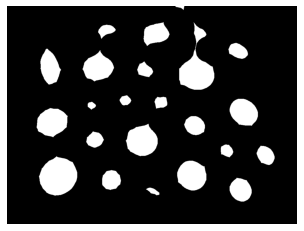

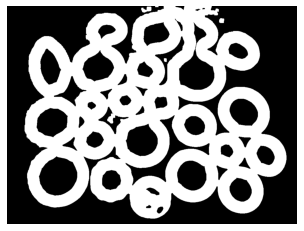

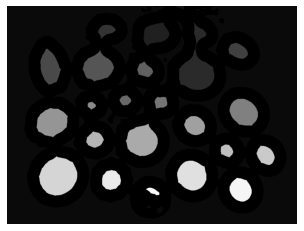

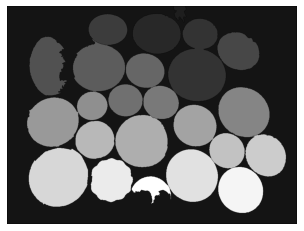

In [36]:
# resmi küçült
ret, sure_foreground = cv2.threshold(dist_transform, 0.4*np.max(dist_transform),255,0)
plt.figure(), plt.imshow(sure_foreground, cmap="gray"), plt.axis("off")

# arka plan için resmi büyült
sure_background = cv2.dilate(opening, kernel, iterations = 1)
sure_foreground = np.uint8(sure_foreground)
unknown = cv2.subtract(sure_background,sure_foreground)
plt.figure(), plt.imshow(unknown, cmap="gray"), plt.axis("off")

# bağlantı
ret, marker = cv2.connectedComponents(sure_foreground)
marker = marker + 1
marker[unknown == 255] = 0
plt.figure(), plt.imshow(marker, cmap="gray"), plt.axis("off")

# havza
marker = cv2.watershed(coin,marker)
plt.figure(), plt.imshow(marker, cmap="gray"), plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1023.5, 767.5, -0.5))

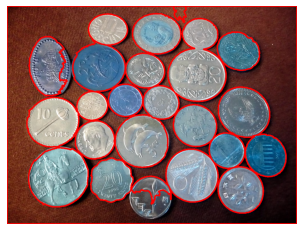

In [37]:
# kontur
# _, contours, hierarchy = cv2.findContours(coin_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(marker.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(coin, contours,i,(255,0,0),2)
plt.figure(),plt.imshow(coin),plt.axis("off")

### 8. Yüz Tanıma 

Benzer özellikler işlevi, birçok pozitif (yüzleri içeren görüntüler) ve negatif (yüzleri içermeyen görüntüler) görüntüden eğitilir.

Daha sonra diğer görüntülerdeki nesneleri tespit etmek için kullanılır.


Yüz tanımlama için daha önceden eğitilen model kullanılır: 

https://github.com/opencv/opencv/tree/master/data/haarcascades


In [38]:
import cv2
import matplotlib.pyplot as plt

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 629.5, 816.5, -0.5))

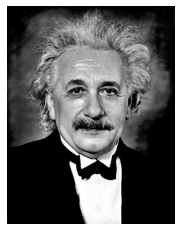

In [39]:
# içe aktar 
einstein = cv2.imread("einstein.jpg", 0)
plt.figure(), plt.imshow(einstein, cmap = "gray"), plt.axis("off")

In [41]:
# sınıflandırıcı
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml") # önceden eğitilmiş sınıflandırıcılar

In [47]:
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [48]:
face_rect = face_cascade.detectMultiScale(einstein,scaleFactor=1.05,minNeighbors=5) 

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 629.5, 816.5, -0.5))

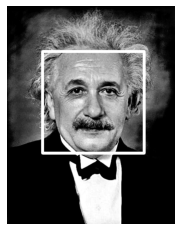

In [49]:
for (x,y,w,h) in face_rect: # resim üzerinde kare oluşturma
    cv2.rectangle(einstein, (x,y),(x+w, y+h),(255,255,255),10)
plt.figure(), plt.imshow(einstein, cmap = "gray"), plt.axis("off")

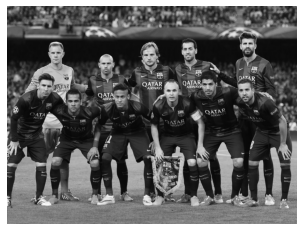

In [50]:
# barcelona resmini sınıflandırma
# içe aktar 
barce = cv2.imread("barcelona.jpg", 0)
plt.figure(), plt.imshow(barce, cmap = "gray"), plt.axis("off")

face_rect = face_cascade.detectMultiScale(barce, minNeighbors = 7) #minNeighbors kutucukların yanında kutucuk varsa onu yuz olarak tanımla demek sayı arttıkca daha dogru sonuc verebılır

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1399.5, 1049.5, -0.5))

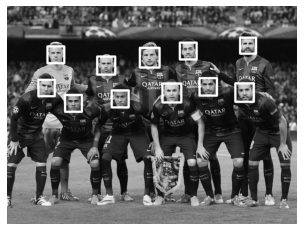

In [51]:
for (x,y,w,h) in face_rect:
    cv2.rectangle(barce, (x,y),(x+w, y+h),(255,255,255),10)
plt.figure(), plt.imshow(barce, cmap = "gray"), plt.axis("off")

##### Videodan yakalama

In [ ]:
# video
cap = cv2.VideoCapture(0)

while True:
    
    ret, frame = cap.read()
    
    if ret:
        
        face_rect = face_cascade.detectMultiScale(frame, minNeighbors = 7)
            
        for (x,y,w,h) in face_rect:
            cv2.rectangle(frame, (x,y),(x+w, y+h),(255,255,255),10)
        cv2.imshow("face detect", frame)
    
    if cv2.waitKey(1) & 0xFF == ord("q"): break

cap.release()
cv2.destroyAllWindows()

### 9. Kedi Yüzü Tanıma 

### 10. Kedi Yüzü Tanıma 

### 11. Özel Benzer Özellikler ile Nesne Algılama